### Approach

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.All the features of _6 and _7 month has been combined as Good phase. _8 as Action phase

Reduced the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

In [1694]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import gc # for deleting unused variables
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import os
import warnings
warnings.filterwarnings('ignore')

# Data

Let's see how does our data look like.

We will see first few entries, its shape and its statistical description

In [1695]:
df_telecom = pd.read_csv("telecom_churn_data.csv")

In [1696]:
df_telecom.shape

(99999, 226)

In [1697]:
df_telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

In [1698]:
df_telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object', length=226)

There are around 226 features and on a very broad level, these can be categorized into:

1. Network Usage (Incoming/Outgoing(2g/3g/Roaming) LOC/STD/ISD/SPL/OTHR Voice calls/Data Calls/)
2. Revenue based on Recharge amount(total = 2g/3g/data)
3. MOU -  Minutes of usage
4. ARPU - Average revenue per user on monthly basis (For voice and data calls)
5. Type of Sevice Pack : Monthly/Sachet/Night/fb_users/Volume based cost
6. AON - Age of the customer on the n/w


### Step 1: Derive new features

## 1. Data Cleaning and analysis

In [1699]:
# Rename the column
#'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'
df_telecom = df_telecom.rename(columns={ 'jun_vbc_3g' : 'vbc_3g_6','jul_vbc_3g' : 'vbc_3g_7','aug_vbc_3g' : 'vbc_3g_8','sep_vbc_3g' : 'vbc_3g_9'})

In [1700]:
# Check the percentage of null values
df_telecom_Null = (df_telecom.isnull().sum(axis = 0)/df_telecom.shape[0])*100
df_telecom_Null[df_telecom_Null>0]

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

### Null Value Treatment

In [1702]:
# Some values are junk like 9.930486593843098e-05, treat them as null
df_telecom['date_of_last_rech_6'].value_counts()  
df_telecom['date_of_last_rech_6'] = df_telecom['date_of_last_rech_6'].fillna(6/30/2014)
df_telecom.loc[df_telecom['date_of_last_rech_6'] == 9.930486593843098e-05, ['date_of_last_rech_6']] = '6/30/2014'

df_telecom['date_of_last_rech_7'].value_counts()
df_telecom['date_of_last_rech_7'] = df_telecom['date_of_last_rech_7'].fillna(7/31/2014)
df_telecom.loc[df_telecom['date_of_last_rech_7'] == 0.00011211839702726079, ['date_of_last_rech_7']] = '7/31/2014'
df_telecom['date_of_last_rech_7'].unique()


df_telecom['date_of_last_rech_8'].value_counts()
df_telecom['date_of_last_rech_8'] = df_telecom['date_of_last_rech_8'].fillna(8/31/2014)
df_telecom.loc[df_telecom['date_of_last_rech_8'] == 0.00012813531088829805, ['date_of_last_rech_8']] = '8/31/2014'
df_telecom['date_of_last_rech_8'].unique()

df_telecom['date_of_last_rech_9'].value_counts()
df_telecom['date_of_last_rech_9'] = df_telecom['date_of_last_rech_9'].fillna(9/29/2014)
df_telecom.loc[df_telecom['date_of_last_rech_9'] == 0.00015409375749066877, ['date_of_last_rech_9']] = '9/29/2014'
df_telecom['date_of_last_rech_9'].unique()

array(['9/28/2014', '9/30/2014', '9/29/2014', '9/20/2014', '9/6/2014',
       '9/21/2014', '9/26/2014', '9/10/2014', '9/24/2014', '9/16/2014',
       '9/27/2014', '9/25/2014', '9/12/2014', '9/17/2014', '9/15/2014',
       '9/8/2014', '9/23/2014', '9/11/2014', '9/22/2014', '9/9/2014',
       '9/19/2014', '9/7/2014', '9/1/2014', '9/2/2014', '9/13/2014',
       '9/3/2014', '9/18/2014', '9/14/2014', '9/5/2014', '9/4/2014'],
      dtype=object)

In [1703]:
# Check the percentage of null values
df_telecom_Null = (df_telecom.isnull().sum(axis = 0)/df_telecom.shape[0])*100
df_telecom_Null[df_telecom_Null>0]

# No more null values

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

In [1704]:
#converting the date columns from object type 
df_telecom['date_of_last_rech_6'] = df_telecom['date_of_last_rech_6'].astype('datetime64[ns]')
df_telecom['date_of_last_rech_7'] = df_telecom['date_of_last_rech_7'].astype('datetime64[ns]')
df_telecom['date_of_last_rech_8'] = df_telecom['date_of_last_rech_8'].astype('datetime64[ns]')
df_telecom['date_of_last_rech_9'] = df_telecom['date_of_last_rech_9'].astype('datetime64[ns]')

df_telecom['date_of_last_rech_data_6'] = df_telecom['date_of_last_rech_data_6'].astype('datetime64[ns]')
df_telecom['date_of_last_rech_data_7'] = df_telecom['date_of_last_rech_data_7'].astype('datetime64[ns]')
df_telecom['date_of_last_rech_data_8'] = df_telecom['date_of_last_rech_data_8'].astype('datetime64[ns]')
df_telecom['date_of_last_rech_data_9'] = df_telecom['date_of_last_rech_data_9'].astype('datetime64[ns]')


#converting date columns date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8, date_of_last_rech_9 
#to number of days columns by picking the day from the date 
df_telecom['days_last_reach_6'] = df_telecom['date_of_last_rech_6'].dt.day
df_telecom['days_last_reach_7'] = df_telecom['date_of_last_rech_7'].dt.day
df_telecom['days_last_reach_8'] = df_telecom['date_of_last_rech_8'].dt.day
df_telecom['days_last_reach_9'] = df_telecom['date_of_last_rech_9'].dt.day

df_telecom['day_of_last_rech_data_6'] = df_telecom['date_of_last_rech_data_6'].dt.day
df_telecom['day_of_last_rech_data_7'] = df_telecom['date_of_last_rech_data_7'].dt.day
df_telecom['day_of_last_rech_data_8'] = df_telecom['date_of_last_rech_data_8'].dt.day
df_telecom['day_of_last_rech_data_9'] = df_telecom['date_of_last_rech_data_9'].dt.day

df_telecom.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis = 1, inplace = True, errors='ignore')

In [1705]:
# Drop some of these columns having 75% missing data
df_telecom.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'], axis = 1, inplace = True, errors='ignore')

In [1706]:
# Check the percentage of null values
df_telecom_Null = (df_telecom.isnull().sum(axis = 0)/df_telecom.shape[0])*100
df_telecom_Null[df_telecom_Null>0]

#Check which columns have more than 0% NULL values.
columns_null_values = pd.Series(df_telecom_Null[df_telecom_Null>0].index)

#print(columns_null_values)

for col in columns_null_values:
    if(df_telecom[col].dtypes == "float64" or df_telecom[col].dtypes == 'int64'):
        df_telecom[col] = df_telecom[col].fillna(0.0)

In [1707]:
df_telecom.shape

(99999, 218)

### Step 2 :Filter high-value customers

-- lets find out High value customer based on these rules

-- recharged with an amount more than or equal to X, 

-- where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [1708]:

##Total recharge for Call and total rechge for data for GOOD PHASE(GP) (6TH AND 7TH MONTH)
df_telecom['GP_Call_rech_amt'] = (df_telecom['total_rech_amt_6']+df_telecom['total_rech_amt_7'])/(df_telecom['total_rech_num_6'] + df_telecom['total_rech_num_7'])
df_telecom['GP_Data_rech_amt'] = (df_telecom['av_rech_amt_data_6'] + df_telecom['av_rech_amt_data_7'])/2
df_telecom['GP_Total_rech_amt'] =  df_telecom['GP_Call_rech_amt'] + df_telecom['GP_Data_rech_amt']

df_telecom['GP_Total_rech_amt'].head()


0    339.714286
1    112.230769
2     53.666667
3     25.714286
4     77.636364
Name: GP_Total_rech_amt, dtype: float64

In [1709]:
telecom_HVC = df_telecom[ (df_telecom['GP_Total_rech_amt'] >= df_telecom['GP_Total_rech_amt'].quantile(0.70)) ]

In [1710]:
telecom_HVC.drop(['total_rech_amt_6', 'total_rech_amt_7','total_rech_num_6','total_rech_num_7','av_rech_amt_data_6', 'av_rech_amt_data_7'], axis = 1, inplace = True)

In [1711]:
telecom_HVC.shape

(29947, 215)

In [1712]:
telecom_HVC.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
count   2.994700e+04    29947.0         29947.0         29947.0         29947.0  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000   29947.000000   29947.000000   29947.000000   29947.000000   29947.000000   29947.000000   29947.000000   29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000  29947.000000  29947.000000  29947.000000  29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000      29947.000000           29947.0           29947.0           29947.0   
mean    7.001220e+09      109.0             0.0             0.0             0.0    433.428206    435.111373    409.401479    383.715581    146.666043    149.496503    137.135241    127.342988    243.980247    245.974765    228.975178    214.876103      13.008090      10.363905      10.531400       9.122692      19.321869      14.586160      14.709347      12.162188         67.861019         68.414259         63.795842         60.100795        128.778244        128.611464        123.733524        118.996755          6.423622          6.497342          6.055693          5.864397          1.266643          1.489409          1.410285          1.196671    203.070634    203.530827    193.592563    184.969197         71.480772         75.631365         68.053516         62.506213         89.627453         94.415834         83.069010         76.523607          1.849149          1.880155          1.671780          1.620516               0.0               0.0               0.0   
std     6.839394e+05        0.0             0.0             0.0             0.0    463.031008    484.445396    491.669161    488.935302    345.756368    362.092474    342.576310    323.821930    393.653750    401.885841    383.810358    368.943013      67.470061      67.422324      69.198624      63.157476     100.603774      82.893309      91.339015      78.684797        201.674918        216.462236        195.394714        185.189064        215.033394        213.926815        206.193128        207.034537         21.751851         20.997884         18.991530         18.661602          5.081302          6.108900          5.973058          5.018357    333.316000    340.165189    321.540348    317.380837        270.262815        280.821450        269.155230        254.139498        295.820719        308.978642        290.087158        272.262110         11.593235         12.477551         10.676736         11.447914               0.0               0.0               0.0   
min     7.000000e+09      109.0             0.0             0.0    

In [1713]:
# All these columns have all values as 0
telecom_HVC.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis =1, inplace = True, errors='ignore')

#Drop circle_id, and last date columns as all are same and redundant info
telecom_HVC.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis =1, inplace = True,errors='ignore')


# Remove all the attributes corresponding to ( _t2 columns) These are detailed columns for operator to operator or other network call and are not much usefull for analysis
t2_cols = [col for col in telecom_HVC.columns if '_t2' in col]
telecom_HVC.drop(t2_cols, axis =1, inplace = True)



In [1714]:
telecom_HVC.shape

(29947, 147)

In [1715]:
#Good Phase Columns - combine(_6 and _7) and find average for all variables
GP_month1_columns = [col for col in telecom_HVC.columns if '_6' in col]
GP_month2_columns = [col for col in telecom_HVC.columns if '_7' in col]

In [1716]:
telecom_HVC_GP_month1 = telecom_HVC[GP_month1_columns]
telecom_HVC_GP_month2 = telecom_HVC[GP_month2_columns]

for idx, col_name in enumerate(GP_month1_columns):
    col_name_raw = str(col_name.split('_6')[0])
    col_name_GP = "GP_" + col_name_raw
    print(col_name_GP)
    telecom_HVC[col_name_GP] = (telecom_HVC_GP_month1.iloc[:,idx] + telecom_HVC_GP_month2.iloc[:,idx]) / 2
    

# Now Remove all the original attributes
telecom_HVC.drop(GP_month1_columns, axis =1, inplace = True)
telecom_HVC.drop(GP_month2_columns, axis =1, inplace = True)

telecom_HVC.head()

GP_arpu
GP_onnet_mou
GP_offnet_mou
GP_roam_ic_mou
GP_roam_og_mou
GP_loc_og_mou
GP_std_og_mou
GP_isd_og_mou
GP_spl_og_mou
GP_og_others
GP_total_og_mou
GP_loc_ic_mou
GP_std_ic_mou
GP_total_ic_mou
GP_spl_ic_mou
GP_isd_ic_mou
GP_ic_others
GP_max_rech_amt
GP_last_day_rch_amt
GP_total_rech_data
GP_max_rech_data
GP_count_rech_2g
GP_count_rech_3g
GP_vol_2g_mb
GP_vol_3g_mb
GP_arpu_3g
GP_arpu_2g
GP_monthly_2g
GP_sachet_2g
GP_monthly_3g
GP_sachet_3g
GP_vbc_3g
GP_days_last_reach
GP_day_of_last_rech_data


mobile_number    arpu_8   arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  offnet_mou_9  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  loc_og_mou_8  loc_og_mou_9  std_og_mou_8  std_og_mou_9  isd_og_mou_8  isd_og_mou_9  spl_og_mou_8  spl_og_mou_9  og_others_8  og_others_9  total_og_mou_8  total_og_mou_9  loc_ic_mou_8  loc_ic_mou_9  std_ic_mou_8  std_ic_mou_9  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_8  isd_ic_mou_9  ic_others_8  ic_others_9  total_rech_num_8  total_rech_num_9  total_rech_amt_8  total_rech_amt_9  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_8  total_rech_data_9  max_rech_data_8  max_rech_data_9  count_rech_2g_8  count_rech_2g_9  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_8  arpu_3g_9  arpu_2g_8  arpu_2g_9  monthly_2g_8  monthly_2g_9  sachet_2g_8  sachet_2g_9  monthly_3g_8  monthly_3g_9  \
0     7000842753   213.803   21.100         0.00         0.00          0.00          0.00           0.00            0.0           0.00            0.0          0.00          0.00          0.00          0.00          0.00           0.0          0.00           0.0          0.0          0.0            0.00            0.00          5.44          0.00          0.00          0.00            5.44            0.00           0.0           0.0          0.00          0.00         0.00          0.0                 2                 6               252                 0             252               0                 252                   0                1.0                0.0            252.0              0.0              0.0              0.0              1.0              0.0               252.0                 0.0         5.75          0.0       109.61          0.0     212.17        0.0     212.17        0.0             0             0            0            0             1             0   
1     7001865778   268.321   86.285         7.68        18.34        304.76         53.76           0.00            0.0           0.00            0.0        299.54         72.11          0.13          0.00          0.00           0.0         12.76           0.0          0.0          0.0          312.44           72.11        408.43        173.03         14.84         15.01          423.28          188.04           0.0           0.0          0.00          0.00         0.00          0.0                11                 5               283               121              65              50                  30                   0                2.0                0.0             25.0              0.0              2.0              0.0              0.0              0.0                50.0                 0.0       365.47          0.0         0.00          0.0       0.00        0.0       7.60        0.0             0             0            2            0             0             0   
7     7000701601  3171.480  500.000        52.29         0.00        325.91          0.00          31.64            0.0          38.06            0.0        255.79          0.00         77.84          0.00         10.01           0.0          6.50           0.0          0.0          0.0          350.16            0.00        188.04          0.00        193.94          0.00          428.74            0.00           0.0           0.0         31.59          0.00        15.14          0.0                 7                 3              3638                 0            1580               0                 779                   0                0.0                0.0              0.0              0.0              0.0              0.0              0.0              0.0                 0.0                 0.0         0.00          0.0         0.00          0.0       0.00        0.0       0.00        0.0             0             0            0            0             0             0   
8     7001524846   137.

In [1717]:
telecom_HVC.shape

(29947, 113)

In [1718]:
# Observation: This indicate that there are some customer who are still recharging but but data and call usage is 0 in Good Phase 
t1 = telecom_HVC.loc[(telecom_HVC['GP_total_ic_mou']+telecom_HVC['GP_total_og_mou'] == 0)&(telecom_HVC['GP_vol_2g_mb']+telecom_HVC['GP_vol_3g_mb'] == 0)]

t1.shape

(206, 113)

In [1719]:
# Drop the rows having 0 minutes of usage for data and call in Good Phase
#telecom_HVC.drop(telecom_HVC.loc[(telecom_HVC['GP_total_ic_mou']+telecom_HVC['GP_total_og_mou'] == 0)&(telecom_HVC['GP_vol_2g_mb']+telecom_HVC['GP_vol_3g_mb'] == 0)].index, inplace= True, axis =0)

In [1720]:
telecom_HVC.shape

(29947, 113)

## Step 3 :Tag churners and remove attributes of the churn phase

In [1721]:
telecom_HVC.head()

mobile_number    arpu_8   arpu_9  onnet_mou_8  onnet_mou_9  offnet_mou_8  offnet_mou_9  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_8  roam_og_mou_9  loc_og_mou_8  loc_og_mou_9  std_og_mou_8  std_og_mou_9  isd_og_mou_8  isd_og_mou_9  spl_og_mou_8  spl_og_mou_9  og_others_8  og_others_9  total_og_mou_8  total_og_mou_9  loc_ic_mou_8  loc_ic_mou_9  std_ic_mou_8  std_ic_mou_9  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_8  isd_ic_mou_9  ic_others_8  ic_others_9  total_rech_num_8  total_rech_num_9  total_rech_amt_8  total_rech_amt_9  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_8  total_rech_data_9  max_rech_data_8  max_rech_data_9  count_rech_2g_8  count_rech_2g_9  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_8  arpu_3g_9  arpu_2g_8  arpu_2g_9  monthly_2g_8  monthly_2g_9  sachet_2g_8  sachet_2g_9  monthly_3g_8  monthly_3g_9  \
0     7000842753   213.803   21.100         0.00         0.00          0.00          0.00           0.00            0.0           0.00            0.0          0.00          0.00          0.00          0.00          0.00           0.0          0.00           0.0          0.0          0.0            0.00            0.00          5.44          0.00          0.00          0.00            5.44            0.00           0.0           0.0          0.00          0.00         0.00          0.0                 2                 6               252                 0             252               0                 252                   0                1.0                0.0            252.0              0.0              0.0              0.0              1.0              0.0               252.0                 0.0         5.75          0.0       109.61          0.0     212.17        0.0     212.17        0.0             0             0            0            0             1             0   
1     7001865778   268.321   86.285         7.68        18.34        304.76         53.76           0.00            0.0           0.00            0.0        299.54         72.11          0.13          0.00          0.00           0.0         12.76           0.0          0.0          0.0          312.44           72.11        408.43        173.03         14.84         15.01          423.28          188.04           0.0           0.0          0.00          0.00         0.00          0.0                11                 5               283               121              65              50                  30                   0                2.0                0.0             25.0              0.0              2.0              0.0              0.0              0.0                50.0                 0.0       365.47          0.0         0.00          0.0       0.00        0.0       7.60        0.0             0             0            2            0             0             0   
7     7000701601  3171.480  500.000        52.29         0.00        325.91          0.00          31.64            0.0          38.06            0.0        255.79          0.00         77.84          0.00         10.01           0.0          6.50           0.0          0.0          0.0          350.16            0.00        188.04          0.00        193.94          0.00          428.74            0.00           0.0           0.0         31.59          0.00        15.14          0.0                 7                 3              3638                 0            1580               0                 779                   0                0.0                0.0              0.0              0.0              0.0              0.0              0.0              0.0                 0.0                 0.0         0.00          0.0         0.00          0.0       0.00        0.0       0.00        0.0             0             0            0            0             0             0   
8     7001524846   137.

In [1722]:
# Create the churn column based on below conditions
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile 
#internet even once in the churn phase. The attributes you need to use to tag churners are:
#total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9

telecom_HVC['Churn'] = 0   # Default value as not Churn

telecom_HVC.loc[(telecom_HVC['total_ic_mou_9']+telecom_HVC['total_og_mou_9'] == 0)&(telecom_HVC['vol_2g_mb_9']+telecom_HVC['vol_3g_mb_9'] == 0), ['Churn'] ] = 1 

# Check the Churn Column
telecom_HVC[['Churn']].head()

Churn
0      1
1      0
7      1
8      0
9      0

In [1723]:
telecom_HVC.shape

(29947, 114)

In [1724]:
# Remove all the attributes corresponding to the churn phase(Drop _9 columns)
Churn_Phase_cols = [col for col in telecom_HVC.columns if '_9' in col]
telecom_HVC.drop(Churn_Phase_cols, axis =1, inplace = True)

In [1725]:
telecom_HVC.shape

(29947, 77)

In [1726]:
telecom_HVC.describe()

mobile_number        arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  loc_ic_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8   ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8   vol_2g_mb_8   vol_3g_mb_8     arpu_3g_8     arpu_2g_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8           aon      vbc_3g_8  days_last_reach_8  day_of_last_rech_data_8  GP_Call_rech_amt  GP_Data_rech_amt  GP_Total_rech_amt       GP_arpu  GP_onnet_mou  GP_offnet_mou  GP_roam_ic_mou  GP_roam_og_mou  GP_loc_og_mou  GP_std_og_mou  GP_isd_og_mou  GP_spl_og_mou  GP_og_others  GP_total_og_mou  GP_loc_ic_mou  GP_std_ic_mou  GP_total_ic_mou  GP_spl_ic_mou  GP_isd_ic_mou  GP_ic_others  GP_max_rech_amt  GP_last_day_rch_amt  GP_total_rech_data  \
count   2.994700e+04  29947.000000  29947.000000  29947.000000   29947.000000   29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000    29947.000000  29947.000000  29947.000000    29947.000000  29947.000000  29947.000000  29947.000000      29947.000000      29947.000000    29947.000000        29947.000000       29947.000000      29947.00000     29947.000000     29947.000000        29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000       29947.000000             29947.000000      29947.000000      29947.000000       29947.000000  29947.000000  29947.000000   29947.000000    29947.000000    29947.000000   29947.000000   29947.000000   29947.000000   29947.000000  29947.000000     29947.000000   29947.000000   29947.000000     29947.000000   29947.000000   29947.000000  29947.000000     29947.000000         29947.000000        29947.000000   
mean    7.001220e+09    409.401479    137.135241    228.975178      10.531400      14.709347    193.592563    152.796775      1.720927      4.795141      0.044860      352.956378    204.478320     38.679366      255.514571      0.023186     11.218239      1.108793          6.932948        468.993388      167.860587           96.336695           1.674358         89.99439         1.222894         0.451464          142.931703    129.277590    404.951017     69.844427     64.740617      0.224764      0.998130      0.244031      0.207433   1296.529068    200.432440          25.465155                11.927372         80.527321        159.491630         240.018951    434.269790    148.081273     244.977506       11.685998       16.954014     203.300730     167.445022       1.870677       4.679909      0.191377       377.494410     208.714467      40.021740       261.133846       0.036916      11.218306      1.135412       181.478278           105.015978            1.862891   
std     6.839394e+05    491.669161    342.576310    383.810358      69.198624      91.339015    321.540348    435.113183     44.038048     15.495522      2.646462      562.585038    301.589351    125.655240      352.143809      0.105853     75.436123     11.395023          6.796459        598.350869      180.397290          152.722494           2.900279        113.34661         2.468253         1.255539          197.648575    334.460096    934.208786    174.162136    156.656971      0.471031      2.478263      0.644646      1.068098   1006.752103    438.966863           6.198832                11.772509         80.072395        171.381094         188.339865    441.540664    335.113706     377.753894       58.407986       81.135850     321.840636     425.996125      44.025883      13.450395      1.845419       549.342851     287.234459     115.853481       334.659515       0.148980      74.105941     11.218642       153.284594           119.883355            2.611704   
min     7.000000e+09   -945.808000      0.000000      0.000000       0.

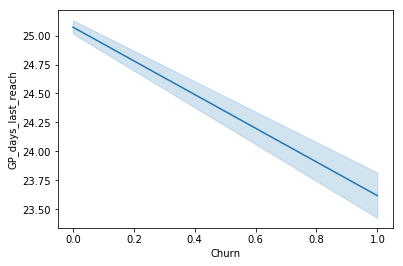

In [1727]:
ax = sns.lineplot(x = "Churn", y = "GP_days_last_reach", data= telecom_HVC)

### Checking the Churn Rate

In [1728]:
churn_rate = (sum(telecom_HVC['Churn'])/len(telecom_HVC['Churn'].index))*100
churn_rate

8.134370721608175

## Task 4: 
### Identify if there is data imbalance in the data. Find the ratio of data imbalance.

11.293513957307061


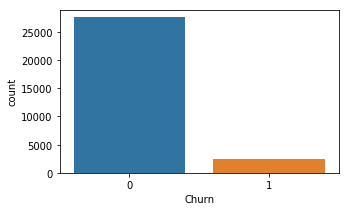

In [1729]:
# Plot the frquency of the Churn column to check for data imbalance.
# As we can see from the below plot, Number with value 0(not churn) is more means, there are less number of Churner(1). 
# As there is a huge difference in values we can say that data is imbalance.
# Ratio of data imbalance 
NUM_Non_Churner = telecom_HVC.loc[(telecom_HVC['Churn'] == 0),'Churn'].count()
NUM_Churner = telecom_HVC.loc[(telecom_HVC['Churn'] == 1),'Churn'].count()
Imbalance_Ratio = NUM_Non_Churner/NUM_Churner

print(Imbalance_Ratio)

# univariate analysis of variable 'Churn'
plt.figure(figsize=(5, 3))
sns.countplot(x="Churn", data=telecom_HVC)
plt.show()

In [1730]:
# 4.2 Data Balancing using Undersampling(undersample majority class)

#Undersampling is the process where you randomly delete some of the observations from the majority class(0) 
#in order to match the numbers with the minority class(1)

# Shuffle the Dataset.
DF_SHUFFLED = telecom_HVC.sample(frac=1,random_state=4)


# Put all the Churned customer in a separate dataset.
telecom_HVC_1 = DF_SHUFFLED.loc[DF_SHUFFLED['Churn'] == 1]

# Count the Numbers of Churned customer
print(telecom_HVC_1['Churn'].count())   #2473
num = telecom_HVC_1['Churn'].count()
#Randomly select 24825 observations from the ALL_CASES(majority class)
telecom_HVC_0 = DF_SHUFFLED.loc[DF_SHUFFLED['Churn'] == 0].sample(n=num,random_state=42)

# Concatenate both dataframes again
telecom_HVC_NORMALIZED = pd.concat([telecom_HVC_1, telecom_HVC_0])


2436


In [1731]:
telecom_HVC_NORMALIZED.shape

(4872, 77)

### Data Visualisation on Balanced data

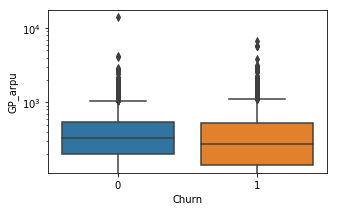

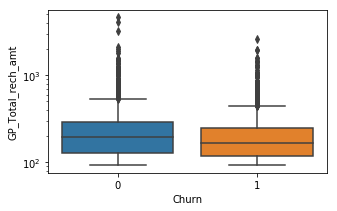

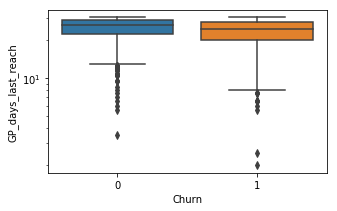

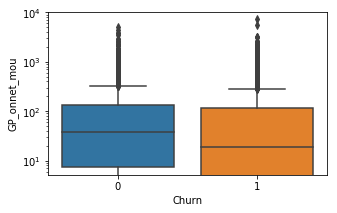

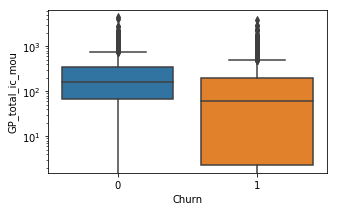

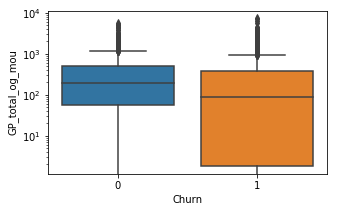

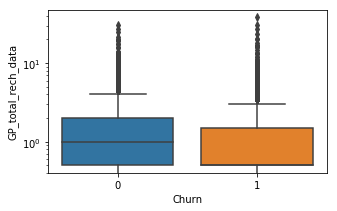

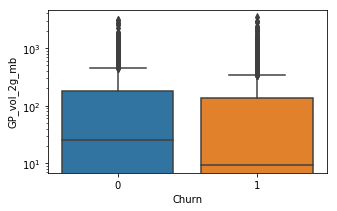

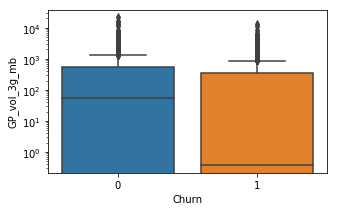

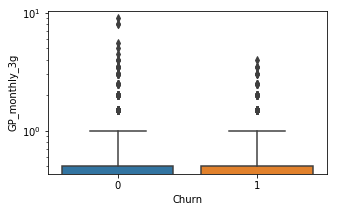

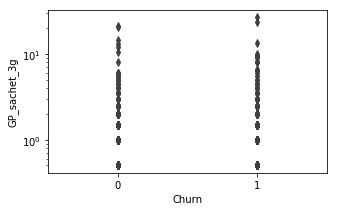

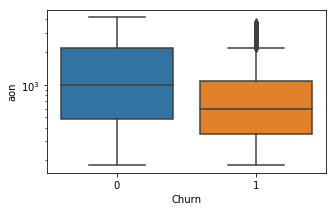

In [1732]:

# Bivariate analysis of numerical variable
for col in ['GP_arpu','GP_Total_rech_amt','GP_days_last_reach','GP_onnet_mou','GP_total_ic_mou','GP_total_og_mou','GP_total_rech_data','GP_vol_2g_mb','GP_vol_3g_mb','GP_monthly_3g','GP_sachet_3g','aon']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=telecom_HVC_NORMALIZED['Churn'], y=col, data=telecom_HVC_NORMALIZED)
    plt.yscale('log')
    plt.show()


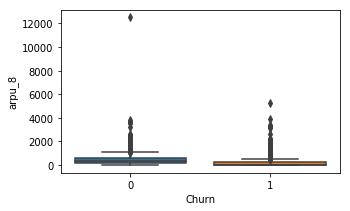

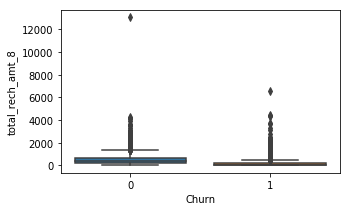

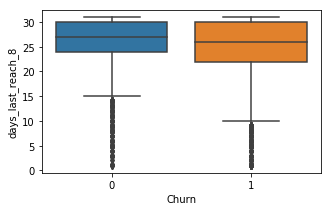

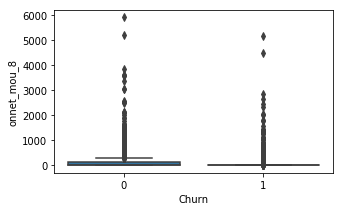

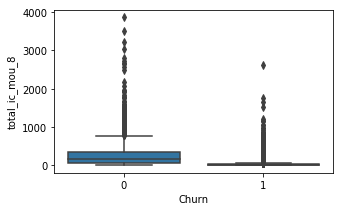

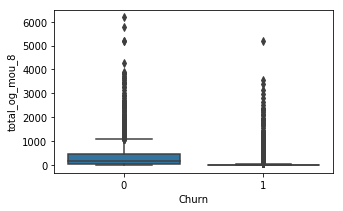

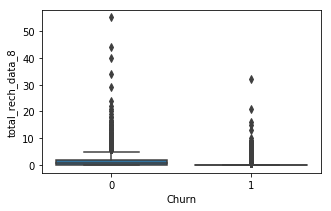

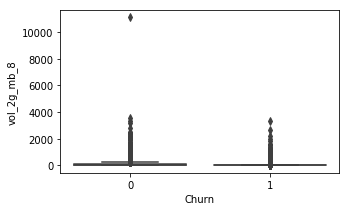

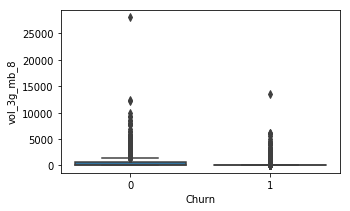

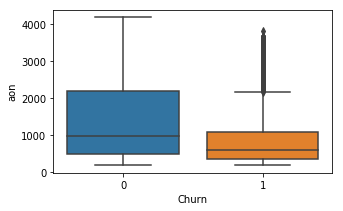

In [1733]:
# Bivariate analysis of numerical variable
for col in ['arpu_8','total_rech_amt_8','days_last_reach_8','onnet_mou_8','total_ic_mou_8','total_og_mou_8','total_rech_data_8','vol_2g_mb_8','vol_3g_mb_8','aon']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=telecom_HVC_NORMALIZED['Churn'], y=col, data=telecom_HVC_NORMALIZED)
    #plt.yscale('log')
    plt.show()


### Some Observations
- 'arpu_8' arpu has reduced drastically for the customer in action phase who are likely to churn.
- 'total_rech_amt_8' Recharge amount has reduced drastically for the customer in action phase who are likely to churn.
- 'onnet_mou_8',  onnet_mou has reduced drastically for the customer in action phase who are likely to churn.
- 'total_ic_mou_8', ic_mou has reduced drastically for the customer in action phase who are likely to churn.
- 'total_og_mou_8', og_mou has reduced drastically for the customer in action phase who are likely to churn.
- 'total_rech_data_8', rechage data has reduced drastically for the customer in action phase who are likely to churn.
- 'vol_2g_mb_8', vol_2g has reduced drastically for the customer in action phase who are likely to churn.
- 'vol_3g_mb_8', vol_3g has reduced drastically for the customer in action phase who are likely to churn.
- 'aon' : Customer who has more age on the network have less tendency of leaving the network. 
   

In [ ]:
# Observation: Customers who have recharged in Good Phase but have 0 usage(call+data) and 0 recharge amount in Action phase are more likely to churn
telecom_HVC_NORMALIZED[['GP_Total_rech_amt','total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8','total_rech_amt_8','last_day_rch_amt_8','days_last_reach_8','Churn']].head(20)

### Observation: 

#### Customers who have recharged in Good Phase but have 0 usage(call+data) and 0 recharge amount in Action phase are more likely to churn

## Model Building
Let's start by splitting our data into a training set and a test set.

In [1735]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_HVC_NORMALIZED.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_HVC_NORMALIZED['Churn']

y.head()

69813    1
5215     1
95576    1
3523     1
65810    1
Name: Churn, dtype: int64

In [1736]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [1737]:
# Scaling the train and test data
colnames = list(X_train.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)

colnames


['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'vbc_3g_8',
 'days_last_reach_8',
 'day_of_last_rech_data_8',
 'GP_Call_rech_amt',
 'GP_Data_rech_amt',
 'GP_Total_rech_amt',
 'GP_arpu',
 'GP_onnet_mou',
 'GP_offnet_mou',
 'GP_roam_ic_mou',
 'GP_roam_og_mou',
 'GP_loc_og_mou',
 'GP_std_og_mou',
 'GP_isd_og_mou',
 'GP_spl_og_mou',
 'GP_og_others',
 'GP_total_og_mou',
 'GP_loc_ic_mou',
 'GP_std_ic_mou',
 'GP_total_ic_mou',
 'GP_spl_ic_mo

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [1738]:
X_train.shape

(3410, 75)

In [1739]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [1740]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [1741]:
pca.components_

array([[ 1.79862402e-01,  6.59703097e-02,  9.70904145e-02, ...,
         1.28810042e-01,  5.69993909e-02,  1.07766433e-01],
       [ 1.88344358e-01,  1.94490545e-01,  2.27640828e-01, ...,
        -5.65059548e-02,  8.50630230e-02, -1.01573116e-01],
       [ 3.63100796e-02,  6.76576899e-02,  4.78518697e-02, ...,
        -4.34586682e-02,  1.50984724e-01,  1.86091422e-01],
       ...,
       [-0.00000000e+00,  1.95270884e-15,  1.99472460e-15, ...,
         1.50093626e-16,  4.92237523e-17, -1.61480924e-17],
       [ 0.00000000e+00,  2.71465698e-15,  2.98037779e-15, ...,
         2.15443813e-16,  7.65312487e-17, -1.89942921e-17],
       [ 0.00000000e+00, -4.43462627e-15, -4.94253250e-15, ...,
        -5.58570840e-18, -1.54380597e-16, -8.61595623e-17]])

In [1742]:

pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

PC1       PC2           Feature
0   0.179862  0.188344            arpu_8
1   0.065970  0.194491       onnet_mou_8
2   0.097090  0.227641      offnet_mou_8
3   0.030960  0.064374     roam_ic_mou_8
4   0.034857  0.090422     roam_og_mou_8
5   0.088623  0.202459      loc_og_mou_8
6   0.066677  0.189932      std_og_mou_8
7   0.032876  0.060699      isd_og_mou_8
8   0.040937  0.068363      spl_og_mou_8
9   0.009414  0.034325       og_others_8
10  0.099235  0.255695    total_og_mou_8
11  0.081743  0.151333      loc_ic_mou_8
12  0.060145  0.083354      std_ic_mou_8
13  0.095789  0.165740    total_ic_mou_8
14  0.018549  0.009010      spl_ic_mou_8
15  0.027803  0.044002      isd_ic_mou_8
16  0.009746  0.032192       ic_others_8
17  0.120540  0.088360  total_rech_num_8
18  0.180044  0.183429  total_rech_amt_8
19  0.144222  0.101221    max_rech_amt_8

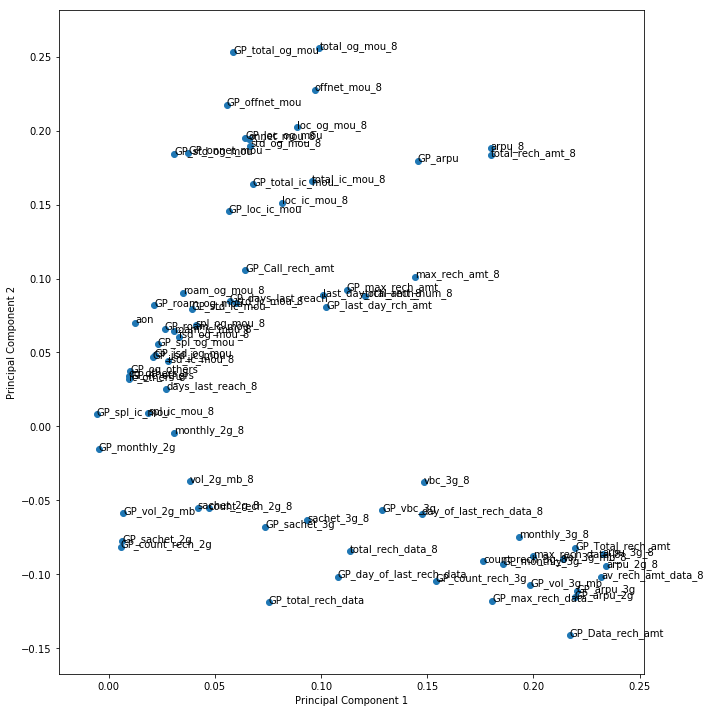

In [1743]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the fist component is in the direction where the 'charges and call minute of usage' variables are heavy
whereas PC2 is high on data mou and data recharge amount

#### Looking at the screeplot to assess the number of needed principal components

In [1744]:
pca.explained_variance_ratio_

array([1.58780592e-01, 1.09277797e-01, 8.99501228e-02, 5.01787357e-02,
       4.23848375e-02, 3.77167032e-02, 3.40886438e-02, 3.16215155e-02,
       3.08415220e-02, 2.94066382e-02, 2.41083609e-02, 2.26864934e-02,
       2.02714723e-02, 1.97291971e-02, 1.77619480e-02, 1.67285177e-02,
       1.61182549e-02, 1.50181641e-02, 1.38933069e-02, 1.34445388e-02,
       1.27221590e-02, 1.16366134e-02, 1.14953567e-02, 1.09693183e-02,
       1.06737126e-02, 9.72386964e-03, 9.48768057e-03, 8.83924382e-03,
       8.58630631e-03, 8.29357031e-03, 7.88285224e-03, 7.37826010e-03,
       6.56850843e-03, 6.40572307e-03, 6.06885889e-03, 5.64778097e-03,
       5.38190987e-03, 5.17637964e-03, 5.03478694e-03, 4.41500889e-03,
       4.35293423e-03, 4.25064297e-03, 3.75180080e-03, 3.53861522e-03,
       3.24845331e-03, 3.01134817e-03, 2.72674036e-03, 2.64307019e-03,
       2.53855050e-03, 2.00004771e-03, 1.73832308e-03, 1.67174671e-03,
       1.55510152e-03, 1.35644034e-03, 1.17888906e-03, 1.17608805e-03,
      

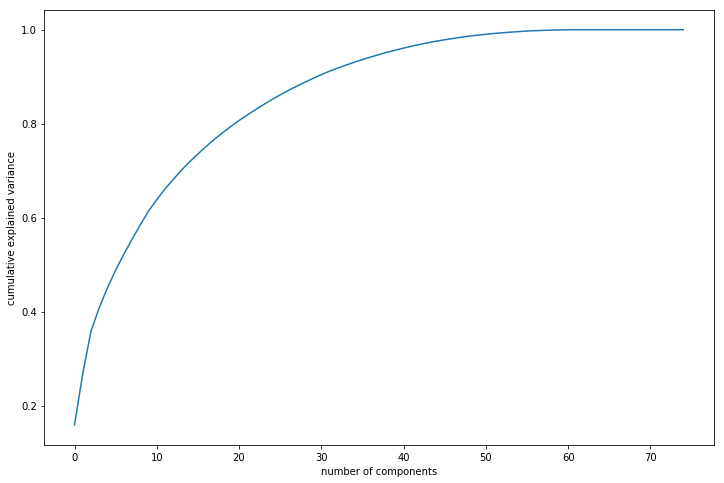

In [1745]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [1746]:
# Check the cumulative value of variance
print (pca.explained_variance_ratio_.cumsum())

[0.15878059 0.26805839 0.35800851 0.40818725 0.45057209 0.48828879
 0.52237743 0.55399895 0.58484047 0.61424711 0.63835547 0.66104196
 0.68131344 0.70104263 0.71880458 0.7355331  0.75165135 0.76666952
 0.78056282 0.79400736 0.80672952 0.81836614 0.82986149 0.84083081
 0.85150452 0.86122839 0.87071607 0.87955532 0.88814162 0.89643519
 0.90431805 0.91169631 0.91826481 0.92467054 0.9307394  0.93638718
 0.94176909 0.94694547 0.95198025 0.95639526 0.9607482  0.96499884
 0.96875064 0.97228926 0.97553771 0.97854906 0.9812758  0.98391887
 0.98645742 0.98845747 0.99019579 0.99186754 0.99342264 0.99477908
 0.99595797 0.99713405 0.99795157 0.99854041 0.99909933 0.99952008
 0.99978684 0.99999621 0.99999902 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [1747]:
n_com= sum(pca.explained_variance_ratio_.cumsum()<=0.95)
print( n_com )

38


In [1748]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=n_com)

#### Basis transformation - getting the data onto our PCs

In [1749]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(3410, 38)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [1750]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

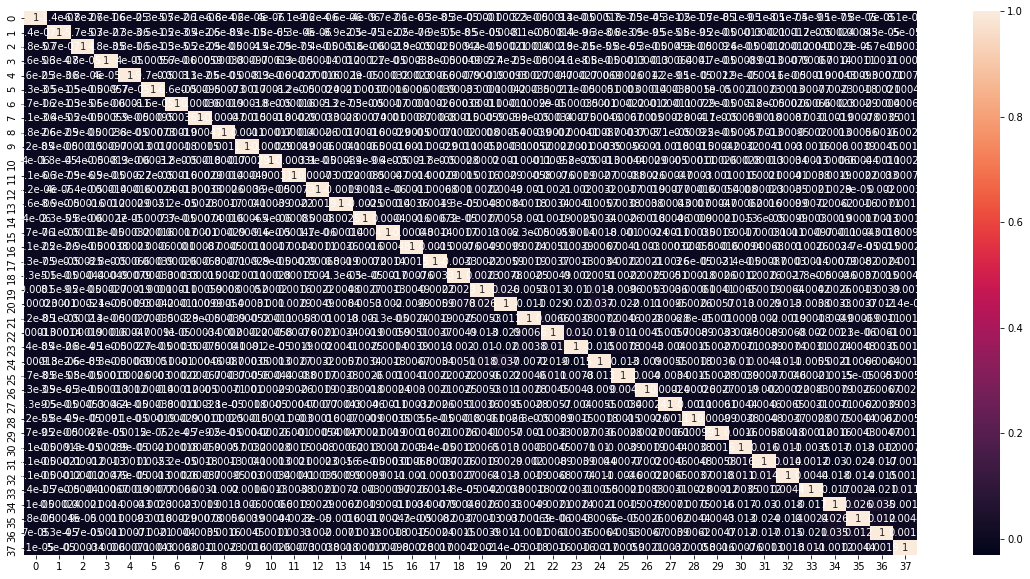

In [1751]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [1752]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03659223131631248 , min corr:  -0.03036262415085233


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [1753]:
#Applying selected components to the test data 
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1462, 38)

## Lets try Different Models On these PCA components

### 1.1 Logistic Regression : Default  on Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

In [2010]:
#Training the model on the PCA train data
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

# Predict the test data
y_pred = model_pca.predict(df_test_pca)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

#Making prediction on the test data n get ROC_AUC
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
print(classification_report(y_test, y_pred))

0.8043775649794802
0.8313090418353576
ROC_AUC 0.88
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       721
           1       0.79      0.83      0.81       741

    accuracy                           0.80      1462
   macro avg       0.81      0.80      0.80      1462
weighted avg       0.80      0.80      0.80      1462



**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

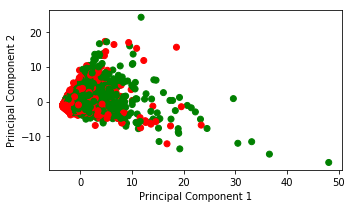

In [1756]:
#visualizing the data
%matplotlib inline
fig = plt.figure(figsize = (5,3))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### 1.2 Logistic regression : Find optimal param using GridSearchCV

In [1978]:
# How to get the correct paramters? CV+Gridsearch CV
# Best C
# L1 or L2 Lasso /Ridge
# Class: Balanced, Weight
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2], 'penalty':['l1','l2']}
logistic = LogisticRegression()

model = GridSearchCV(estimator = logistic, cv = 5, param_grid = params, n_jobs = -1,scoring = "recall")
model.fit(df_train_pca, y_train)

print(model.best_score_)
print(model.best_params_)

0.8548672566371681
{'C': 0.1, 'penalty': 'l1'}


### 1.3 Logistic regression : using optimised param

In [2009]:
#  

logreg = LogisticRegression(penalty = 'l1', C=0.1)
logreg.fit(df_train_pca, y_train)

y_pred = logreg.predict(df_test_pca)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
#Making prediction on the test data
pred_probs_test = logreg.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

#print(metrics.classification_report(y_test, y_pred))

# not much difference even after tuning the param
print(classification_report(y_test, y_pred))

0.8036935704514364
0.8313090418353576
0.7917737789203085
ROC_AUC 0.88
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       721
           1       0.79      0.83      0.81       741

    accuracy                           0.80      1462
   macro avg       0.80      0.80      0.80      1462
weighted avg       0.80      0.80      0.80      1462



### 2.1 Random Forest : Default Hyperparameters

In [2012]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(df_train_pca,y_train)
# Making predictions
predictions = rfc.predict(df_test_pca)

print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions))

#Making prediction on the test data
pred_probs_test = rfc.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

print(classification_report(y_test, predictions))

0.7838577291381669
0.7273954116059379
ROC_AUC 0.86
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       721
           1       0.83      0.73      0.77       741

    accuracy                           0.78      1462
   macro avg       0.79      0.78      0.78      1462
weighted avg       0.79      0.78      0.78      1462



### 2.2 Random Forest : Grid Search to Find Optimal Hyperparameters

In [1958]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 50, 5),
    'min_samples_split': range(5, 50, 5),
    'n_estimators': [50,100], 
    'max_features': range(5, 20, 5)
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

grid_search.fit(df_train_pca, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed: 16.3min finished


We can get accuracy of 0.8228739002932551 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}


### 2.3 Random Forest : Tuned Hyperparameter

In [2014]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=5, 
                             min_samples_split=5,
                             max_features=15,
                             n_estimators=50,
                            )
                  
rfc.fit(df_train_pca,y_train)
# Making predictions
predictions = rfc.predict(df_test_pca)

print(metrics.accuracy_score(y_test, predictions))
print(metrics.recall_score(y_test, predictions))

#Making prediction on the test data
pred_probs_test = rfc.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

print(classification_report(y_test, predictions))

0.8119015047879617
0.7908232118758435
ROC_AUC 0.88
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       721
           1       0.83      0.79      0.81       741

    accuracy                           0.81      1462
   macro avg       0.81      0.81      0.81      1462
weighted avg       0.81      0.81      0.81      1462



### 3.1 DecisionTreeClassifier: Default

In [2015]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier()
dt_default.fit(df_train_pca, y_train)

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

print(metrics.accuracy_score(y_test, y_pred_default))
print(metrics.recall_score(y_test, y_pred_default))
#Making prediction on the test data
pred_probs_test = dt_default.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

# Printing classification report
print(classification_report(y_test, y_pred_default))

0.707250341997264
0.6842105263157895
ROC_AUC 0.71
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       721
           1       0.72      0.68      0.70       741

    accuracy                           0.71      1462
   macro avg       0.71      0.71      0.71      1462
weighted avg       0.71      0.71      0.71      1462



### 3.2DecisionTreeClassifier: Grid Search to Find Optimal Hyperparameters

In [1920]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 50, 5),
    'min_samples_split': range(5, 50, 5),
    'criterion': ["entropy", "gini"]
}


n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds,n_jobs = -1, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   14.5s


We can get accuracy of 0.8372434017595308 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 35, 'min_samples_split': 5}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   27.8s finished


In [2165]:
# model with optimal hyperparameters
D_tree = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=35,
                                  min_samples_split=5)
D_tree.fit(df_train_pca, y_train)

y_pred = D_tree.predict(df_test_pca)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
#Making prediction on the test data
pred_probs_test = D_tree.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
print(classification_report(y_test, y_pred))

0.761969904240766
0.7557354925775979
ROC_AUC 0.83
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       721
           1       0.77      0.76      0.76       741

    accuracy                           0.76      1462
   macro avg       0.76      0.76      0.76      1462
weighted avg       0.76      0.76      0.76      1462



### 3.3 Decision Tree using ADABoost 

In [2166]:
estimators = list(range(50, 300, 50))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=D_tree, 
    n_estimators = n_est)
    
    ABC.fit(df_train_pca, y_train)
    y_pred = ABC.predict(df_test_pca)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

abc_scores

[0.7824897400820794,
 0.7954856361149111,
 0.7968536251709987,
 0.8173734610123119,
 0.8071135430916553]

In [2167]:
ABC = AdaBoostClassifier(
    base_estimator=D_tree, 
    n_estimators = 250)

ABC.fit(df_train_pca, y_train)

#Train Set
y_pred = ABC.predict(df_train_pca)
print(metrics.accuracy_score(y_train, y_pred))
print(metrics.recall_score(y_train, y_pred))

#Test Set
y_pred = ABC.predict(df_test_pca)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

#Making prediction on the test data
pred_probs_test = ABC.predict_proba(df_test_pca)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

print(classification_report(y_test, y_pred))

1.0
1.0
0.801641586867305
0.8002699055330634
ROC_AUC 0.88
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       721
           1       0.81      0.80      0.80       741

    accuracy                           0.80      1462
   macro avg       0.80      0.80      0.80      1462
weighted avg       0.80      0.80      0.80      1462



## 5. Model Evaluation

Below is the metric we can evaluate our model on

Model	             Precision Recall Accuracy ROC_AUC

Logistic(Default)	    0.79	0.83	0.80    0.88

Logistic(Tuned:lasso)	0.79	0.83	0.80 	0.88

Random Forest	        0.82	0.74	0.79	0.86

Random Forest(Tuned)	0.83	0.79	0.81	0.88

Decision Tree(Default)	0.72	0.68	0.71	0.71

Decision Tree(Tuned)	0.77	0.76	0.76	0.83

Decision Tree(Adaboost)	0.82	0.82	0.82	0.88


#### Recommandation:
As per above results, Logistic Regression tuned with lasso hyperparameter regularisation is giving the best result. Recall is highest ( No. of churn customers correctly predicted by this model is highest).
This model is simplest above all

### Part 2: Logistic Regression For extracting features.

In [2145]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_HVC_NORMALIZED.drop(['Churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_HVC_NORMALIZED['Churn']

y.head()

69813    1
5215     1
95576    1
3523     1
65810    1
Name: Churn, dtype: int64

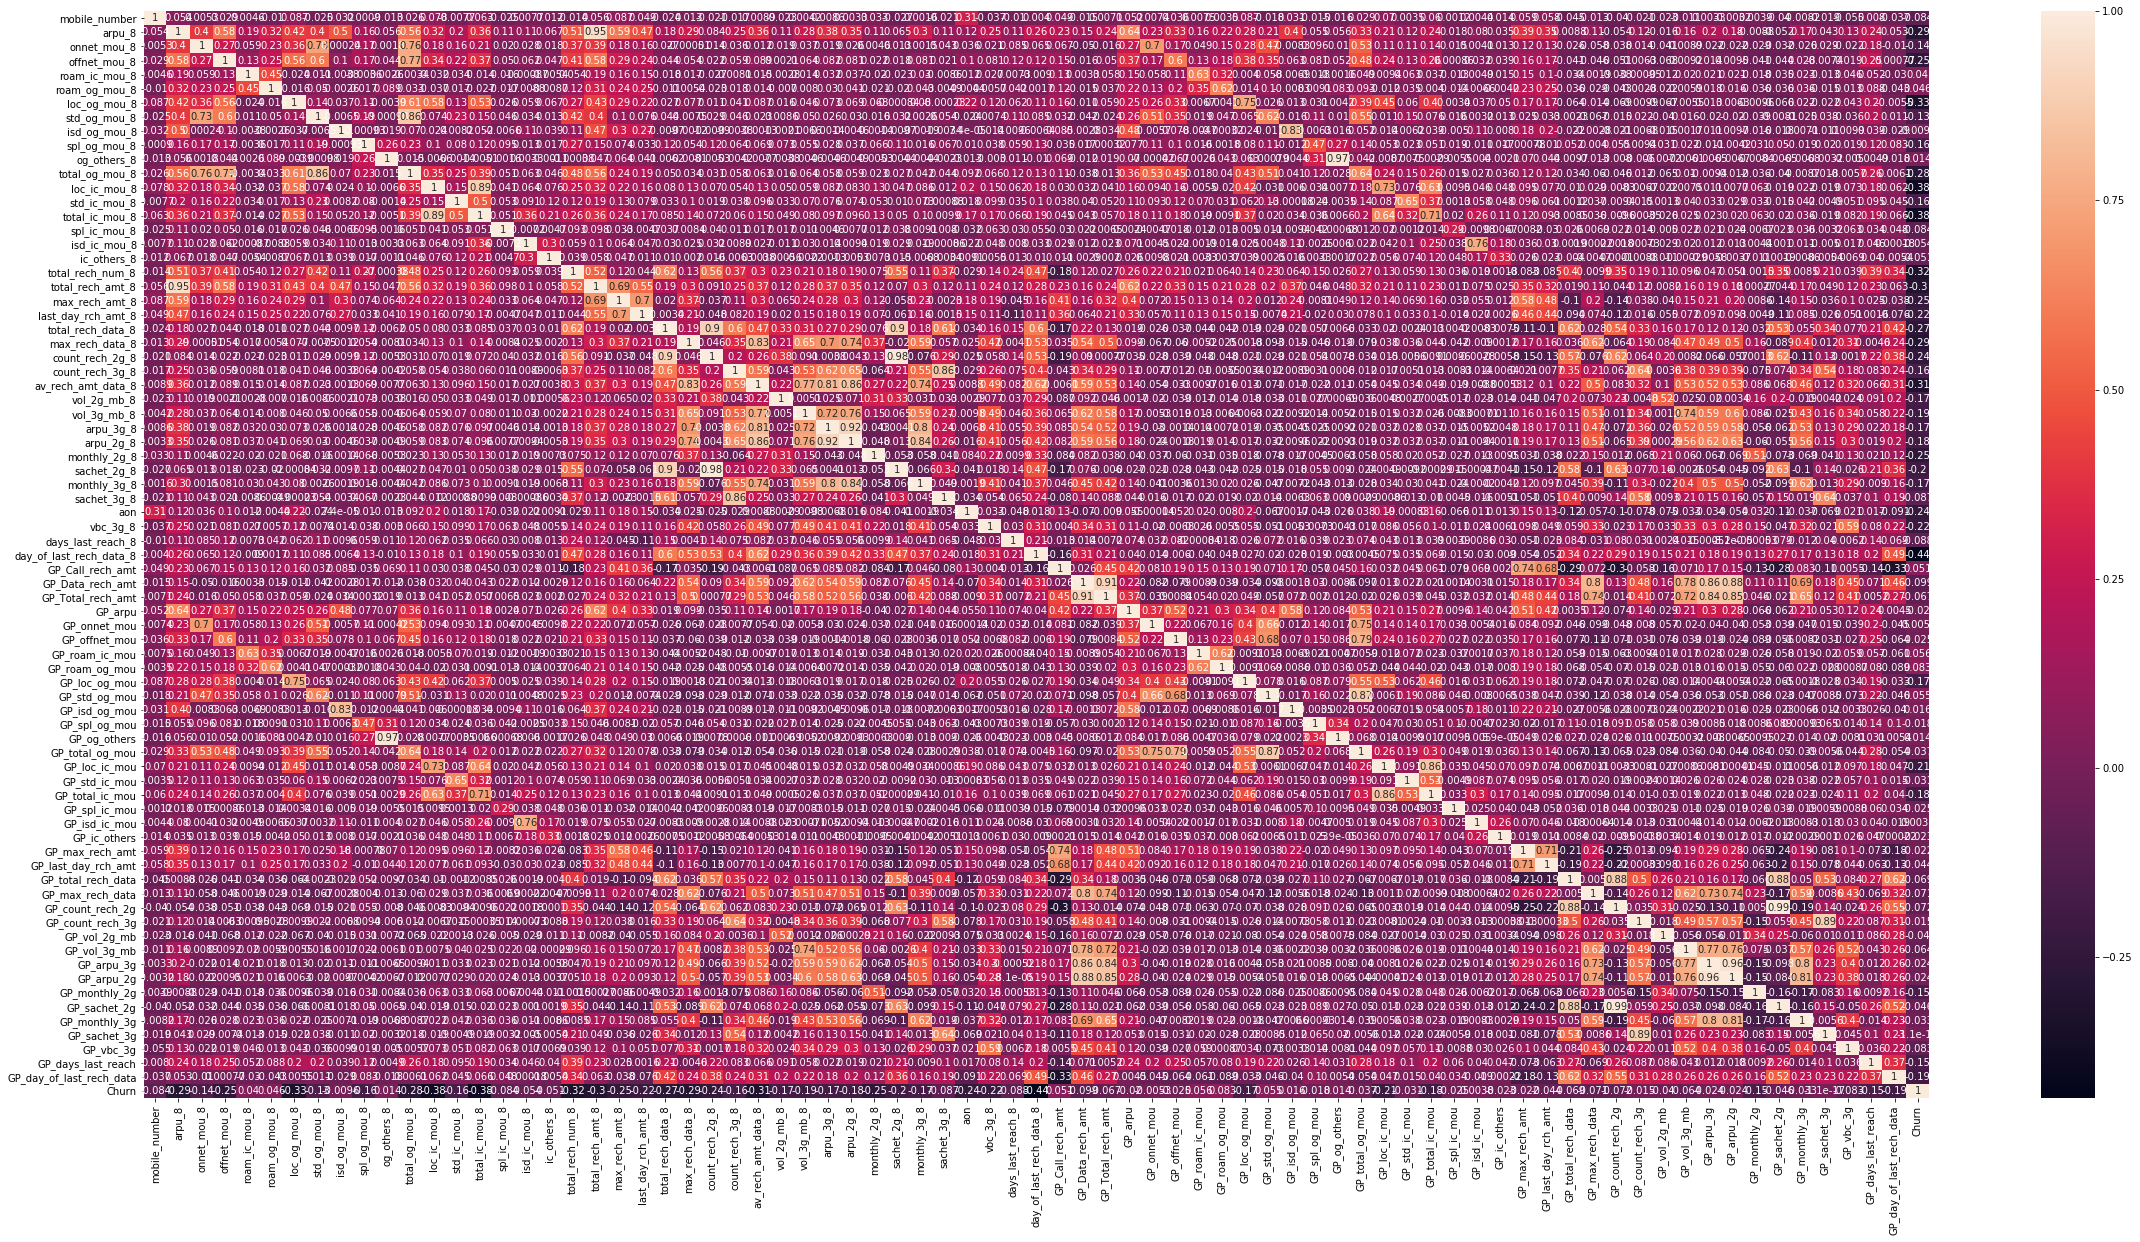

In [2146]:
plt.figure(figsize = (40,20))
sns.heatmap(telecom_HVC_NORMALIZED.corr(),annot = True)
plt.show()

In [2147]:
correlation_1 = telecom_HVC_0.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind="quicksort")
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print(correlation_1)


GP_isd_ic_mou             og_others_8                 0.000003
og_others_8               GP_isd_ic_mou               0.000003
GP_sachet_2g              ic_others_8                 0.000029
ic_others_8               GP_sachet_2g                0.000029
total_ic_mou_8            vol_3g_mb_8                 0.000056
vol_3g_mb_8               total_ic_mou_8              0.000056
GP_max_rech_data          isd_ic_mou_8                0.000080
isd_ic_mou_8              GP_max_rech_data            0.000080
og_others_8               count_rech_3g_8             0.000089
count_rech_3g_8           og_others_8                 0.000089
loc_og_mou_8              roam_og_mou_8               0.000104
roam_og_mou_8             loc_og_mou_8                0.000104
GP_vbc_3g                 GP_Call_rech_amt            0.000183
GP_Call_rech_amt          GP_vbc_3g                   0.000183
max_rech_amt_8            vol_2g_mb_8                 0.000186
vol_2g_mb_8               max_rech_amt_8              0

In [2148]:
#Drop the columns which are highly correlated
# Drop the variables whicha re highly correlated
X.drop(['count_rech_2g_8','GP_count_rech_2g','GP_og_others','total_rech_amt_8','GP_Total_rech_amt','total_rech_data_8','GP_count_rech_3g','total_ic_mou_8','GP_Data_rech_amt', 'GP_total_ic_mou','arpu_3g_8'],axis = 1,inplace = True)

In [2149]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [2150]:
# Scaling the train and test data
colnames = list(X_train.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)

colnames


['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'vbc_3g_8',
 'days_last_reach_8',
 'day_of_last_rech_data_8',
 'GP_Call_rech_amt',
 'GP_arpu',
 'GP_onnet_mou',
 'GP_offnet_mou',
 'GP_roam_ic_mou',
 'GP_roam_og_mou',
 'GP_loc_og_mou',
 'GP_std_og_mou',
 'GP_isd_og_mou',
 'GP_spl_og_mou',
 'GP_total_og_mou',
 'GP_loc_ic_mou',
 'GP_std_ic_mou',
 'GP_spl_ic_mou',
 'GP_isd_ic_mou',
 'GP_ic_others',
 'GP_max_rech_amt',
 'GP_last_day_rch_amt',
 'GP_total_rech_data',
 'GP_max_rech_data',
 'GP_vol_2g_mb',
 'GP_vol_3g_mb',
 'GP_arpu_3g',


In [2151]:
# Reassign X_train columns
X_train.columns = colnames

In [2152]:
# Logistic Regression Model
# Question-8: What is the accuracy of the Logistic Regression model on test data using SKLearn with default parameters?


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.801641586867305
0.8218623481781376


In [2153]:
#Making prediction on the test data
pred_probs_test = logreg.predict_proba(X_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [2100]:
n = X_train.shape[1]
n  

64

In [2101]:
#### Lets use Range of hyperparameter RFE to find the optimal no. of features
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,n))}]


# step-3: perform grid search
# 3.1 specify model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rfe = RFE(logreg)             

# 3.2 call GridSearchCV()
grid_search = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
grid_search.fit(X_train, y_train)                  
n_features_optimal = grid_search.best_params_['n_features_to_select']

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:  2.2min finished


In [2154]:
n_features_optimal

29

In [2155]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg,n_features_optimal )    # running RFE with 58 variables as output
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True  True False False  True False  True  True False False  True
 False  True  True  True  True False  True  True False False  True  True
 False False  True False False  True  True False  True  True False False
 False False  True False False False False  True  True False False  True
 False False  True  True  True  True False False False  True False False
 False False False False]
[ 1  1  1 28 24  1 26  1  1 13 23  1  2  1  1  1  1  4  1  1 18 29  1  1
  5 12  1 11 32  1  1 19  1  1  6 27 34  9  1 21 15 35 22  1  1  8 10  1
 30  3  1  1  1  1 31  7 36  1 25 33 16 17 14 20]


In [2156]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 28),
 ('roam_og_mou_8', False, 24),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_8', False, 26),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_8', False, 13),
 ('total_og_mou_8', False, 23),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_8', False, 2),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 4),
 ('last_day_rch_amt_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('count_rech_3g_8', False, 18),
 ('av_rech_amt_data_8', False, 29),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', True, 1),
 ('arpu_2g_8', False, 5),
 ('monthly_2g_8', False, 12),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', False, 11),
 ('sachet_3g_8', False, 32),
 ('aon', True, 1),
 ('vbc_3g_8', True, 1),
 ('days_last_reach_8', False, 19),
 ('day_of_last_rech_data_8', True, 1),
 ('GP_Call_rech_amt', True, 1),
 ('G

In [2157]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'aon', 'vbc_3g_8', 'day_of_last_rech_data_8', 'GP_Call_rech_amt', 'GP_roam_og_mou', 'GP_total_og_mou', 'GP_loc_ic_mou', 'GP_isd_ic_mou', 'GP_last_day_rch_amt', 'GP_total_rech_data', 'GP_max_rech_data', 'GP_vol_2g_mb', 'GP_monthly_2g'], dtype='object')

In [2158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features   VIF
0                    arpu_8  3.80
12          max_rech_data_8  3.44
10         total_rech_num_8  3.05
8              isd_ic_mou_8  2.83
6              loc_ic_mou_8  2.77
23            GP_isd_ic_mou  2.63
15              sachet_2g_8  2.61
2              offnet_mou_8  2.52
24      GP_last_day_rch_amt  2.44
19         GP_Call_rech_amt  2.43
18  day_of_last_rech_data_8  2.39
3              loc_og_mou_8  2.27
22            GP_loc_ic_mou  2.25
14              vol_3g_mb_8  2.23
26         GP_max_rech_data  2.01
21          GP_total_og_mou  1.93
1               onnet_mou_8  1.88
25       GP_total_rech_data  1.82
13              vol_2g_mb_8  1.74
27             GP_vol_2g_mb  1.67
17                 vbc_3g_8  1.49
11       last_day_rch_amt_8  1.48
28            GP_monthly_2g  1.30
4              isd_og_mou_8  1.26
9               ic_others_8  1.16
20           GP_roam_og_mou  1.14
16                      aon  1.13
5              spl_og_mou_8  1.11
7              spl_ic_mou_8  1.06

In [2160]:
# predict accuracy and recall of X_train
y_train_pred = rfe.predict(X_train)

print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.recall_score(y_train, y_train_pred))

#Making prediction on the test data
pred_probs_train = rfe.predict_proba(X_train)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_train, pred_probs_train))

0.8249266862170088
0.855457227138643


'0.90'

In [2161]:
# predict accuracy and recall of X_test
y_pred = rfe.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

#Making prediction on the test data
pred_probs_test = rfe.predict_proba(X_test)[:,1]
print("ROC_AUC {:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

print(classification_report(y_test, y_pred))

0.7975376196990424
0.8232118758434548
ROC_AUC 0.88
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       721
           1       0.79      0.82      0.80       741

    accuracy                           0.80      1462
   macro avg       0.80      0.80      0.80      1462
weighted avg       0.80      0.80      0.80      1462



In [2162]:
#visualizing results
feature_cols = vif['Features']

In [2163]:
X_train = X_train[feature_cols]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 29 columns):
arpu_8                     3410 non-null float64
max_rech_data_8            3410 non-null float64
total_rech_num_8           3410 non-null float64
isd_ic_mou_8               3410 non-null float64
loc_ic_mou_8               3410 non-null float64
GP_isd_ic_mou              3410 non-null float64
sachet_2g_8                3410 non-null float64
offnet_mou_8               3410 non-null float64
GP_last_day_rch_amt        3410 non-null float64
GP_Call_rech_amt           3410 non-null float64
day_of_last_rech_data_8    3410 non-null float64
loc_og_mou_8               3410 non-null float64
GP_loc_ic_mou              3410 non-null float64
vol_3g_mb_8                3410 non-null float64
GP_max_rech_data           3410 non-null float64
GP_total_og_mou            3410 non-null float64
onnet_mou_8                3410 non-null float64
GP_total_rech_data         3410 non-null float64
vol_2g_mb_8

In [2112]:
y_train = list(y_train)

In [2113]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3410
Model:                            GLM   Df Residuals:                     3380
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.9
Date:                Mon, 04 Nov 2019   Deviance:                       2903.8
Time:                        19:34:02   Pearson chi2:                 3.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2872      0.053     -5.429      0.000      -0.391      -0.184
arpu_8                      0.2306      0.108      2.139      0.032       0.019       0.442
max_rech_data_8            -0.2008      0.087     -2.312      0.021      -0.371      -0.031
total_rech_num_8           -0.2373      0.093     -2.548      0.011      -0.420      -0.055
isd_ic_mou_8               -0.2608      0.108     -2.415      0.016      -0.472      -0.049
loc_ic_mou_8               -1.5406      0.165     -9.316      0.000      -1.865      -1.217
GP_isd_ic_mou               0.1735      0.091      1.908      0.056      -0.005       0.352
sachet_2g_8                -0.1472      0.092     -1.603      0.109      -0.327       0.033
offnet_mou_8               -0.4932      0.110     -4.465      0.000      -0.710      -0.277
GP_last_day_rch_amt        -0.1741      0.073     -2.380      0.017      -0.317      -0.031
GP_Call_rech_amt            0.2584      0.080      3.244      0.001       0.102       0.414
day_of_last_rech_data_8    -0.6377      0.077     -8.333      0.000      -0.788      -0.488
loc_og_mou_8               -0.3068      0.118     -2.593      0.010      -0.539      -0.075
GP_loc_ic_mou               0.5043      0.115      4.370      0.000       0.278       0.730
vol_3g_mb_8                -0.1758      0.097     -1.818      0.069      -0.365       0.014
GP_max_rech_data            0.3135      0.071      4.391      0.000       0.174       0.454
GP_total_og_mou             0.5478      0.093      5.864      0.000       0.365       0.731
onnet_mou_8                -0.2890      0.079     -3.656      0.000      -0.444      -0.134
GP_total_rech_data          0.1578      0.069      2.286      0.022       0.023       0.293
vol_2g_mb_8                -0.3152      0.089     -3.541      0.000      -0.490      -0.141
GP_vol_2g_mb                0.2521      0.070      3.621      0.000       0.116       0.389
vbc_3g_8                   -0.1658      0.078     -2.127      0.033      -0.319      -0.013
last_day_rch_amt_8         -0.3512      0.063     -5.535      0.000      -0.476      -0.227
GP_monthly_2g              -0.2945      0.058     -5.095      0.000      -0.408      -0.181
isd_og_mou_8                0.1591      0.051      3.117      0.002       0.059       0.259
ic_others_8                -0.2403      0.161     -1.490      0.136      -0.556       0.076
GP_roam_og_mou              0.3809      0.074      5.175      0.000       0.237       0.525
aon                        -0.4242      0.051     -8.318      0.000      -0.524      -0.324
spl_og_mou_8               -0.1664      0.061     -2.711      0.007      -0.287      -0.046
spl_ic_mou_8               -0.1715      0.090     -1.909      0.056      -0.348       0.005
===========================================================================================
"""

In [2123]:
X_train.drop(['sachet_2g_8','vol_3g_mb_8','ic_others_8'],axis = 1, inplace = True)

In [2125]:
X_train.drop(['GP_total_rech_data','spl_ic_mou_8'],axis = 1, inplace = True)

In [2127]:
X_train.drop(['GP_isd_ic_mou'],axis = 1, inplace = True)

In [2129]:
X_train.drop(['isd_ic_mou_8'],axis = 1, inplace = True)

In [2130]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3410
Model:                            GLM   Df Residuals:                     3387
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1464.1
Date:                Mon, 04 Nov 2019   Deviance:                       2928.3
Time:                        19:38:52   Pearson chi2:                 3.43e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2838      0.053     -5.381      0.000      -0.387      -0.180
arpu_8                      0.1976      0.099      2.000      0.045       0.004       0.391
max_rech_data_8            -0.2516      0.075     -3.362      0.001      -0.398      -0.105
total_rech_num_8           -0.2569      0.082     -3.118      0.002      -0.418      -0.095
loc_ic_mou_8               -1.6061      0.166     -9.703      0.000      -1.930      -1.282
offnet_mou_8               -0.4947      0.107     -4.606      0.000      -0.705      -0.284
GP_last_day_rch_amt        -0.1813      0.071     -2.537      0.011      -0.321      -0.041
GP_Call_rech_amt            0.2331      0.077      3.025      0.002       0.082       0.384
day_of_last_rech_data_8    -0.6685      0.068     -9.879      0.000      -0.801      -0.536
loc_og_mou_8               -0.2850      0.117     -2.438      0.015      -0.514      -0.056
GP_loc_ic_mou               0.5413      0.115      4.698      0.000       0.315       0.767
GP_max_rech_data            0.3005      0.069      4.379      0.000       0.166       0.435
GP_total_og_mou             0.5455      0.093      5.851      0.000       0.363       0.728
onnet_mou_8                -0.2842      0.078     -3.634      0.000      -0.437      -0.131
vol_2g_mb_8                -0.2986      0.087     -3.437      0.001      -0.469      -0.128
GP_vol_2g_mb                0.2844      0.068      4.195      0.000       0.152       0.417
vbc_3g_8                   -0.2107      0.072     -2.909      0.004      -0.353      -0.069
last_day_rch_amt_8         -0.3391      0.062     -5.469      0.000      -0.461      -0.218
GP_monthly_2g              -0.3035      0.056     -5.410      0.000      -0.413      -0.194
isd_og_mou_8                0.1476      0.047      3.152      0.002       0.056       0.239
GP_roam_og_mou              0.3948      0.073      5.406      0.000       0.252       0.538
aon                        -0.4304      0.051     -8.493      0.000      -0.530      -0.331
spl_og_mou_8               -0.1719      0.061     -2.838      0.005      -0.291      -0.053
===========================================================================================
"""

In [2131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train.columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features   VIF
0                    arpu_8  3.60
3              loc_ic_mou_8  2.75
1           max_rech_data_8  2.69
4              offnet_mou_8  2.48
5       GP_last_day_rch_amt  2.41
6          GP_Call_rech_amt  2.37
2          total_rech_num_8  2.35
8              loc_og_mou_8  2.27
9             GP_loc_ic_mou  2.24
7   day_of_last_rech_data_8  1.99
10         GP_max_rech_data  1.97
11          GP_total_og_mou  1.92
12              onnet_mou_8  1.84
14             GP_vol_2g_mb  1.57
13              vol_2g_mb_8  1.54
16       last_day_rch_amt_8  1.48
15                 vbc_3g_8  1.35
18             isd_og_mou_8  1.23
17            GP_monthly_2g  1.22
19           GP_roam_og_mou  1.13
20                      aon  1.12
21             spl_og_mou_8  1.10

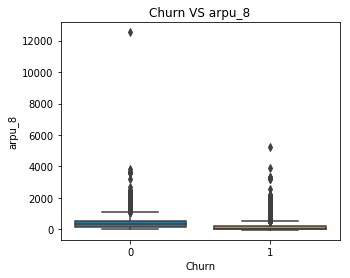

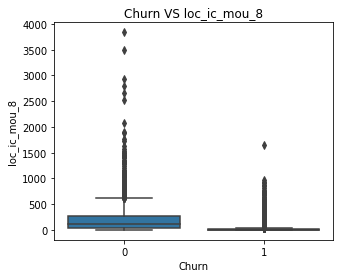

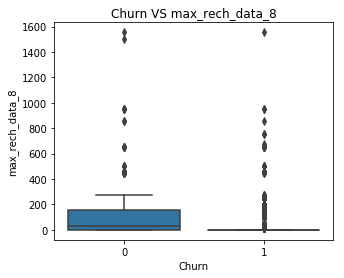

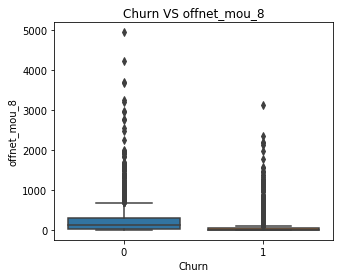

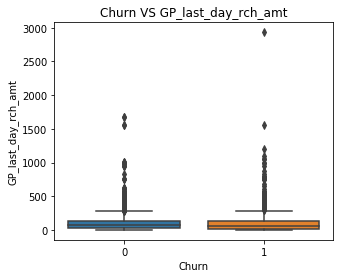

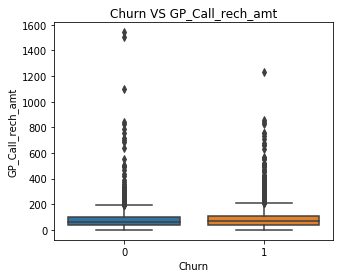

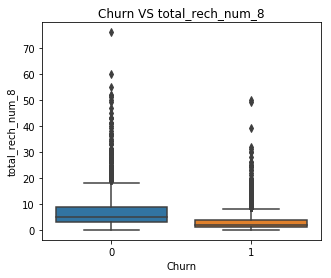

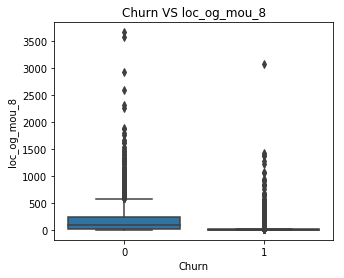

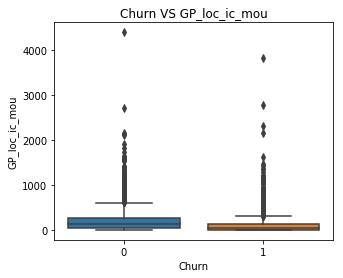

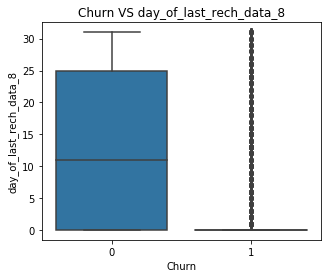

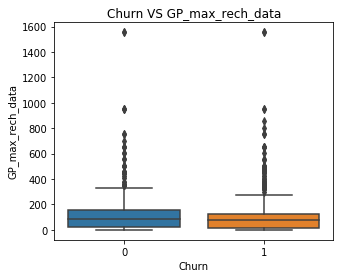

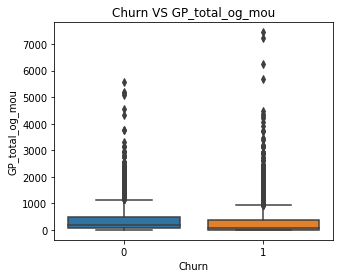

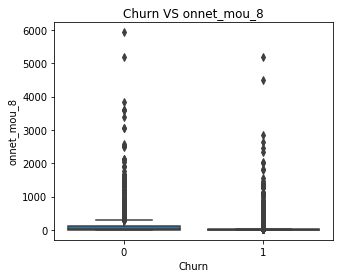

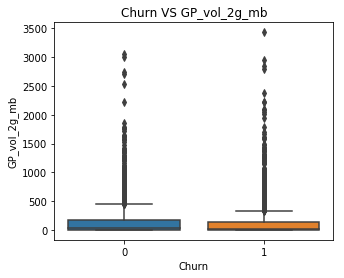

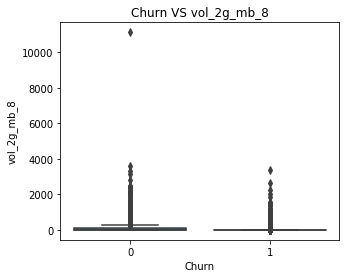

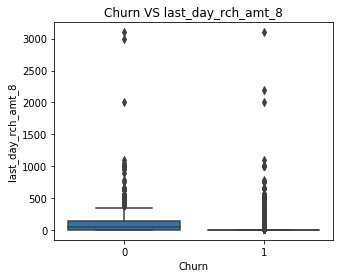

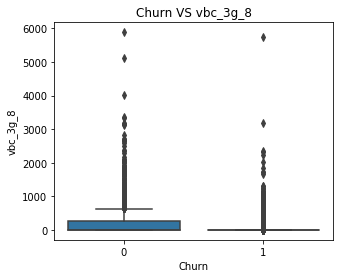

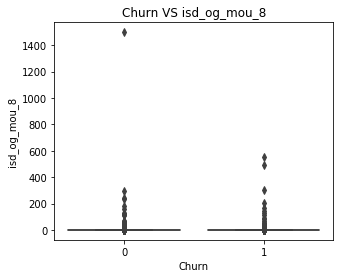

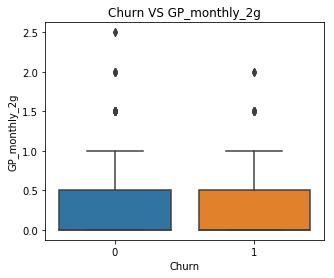

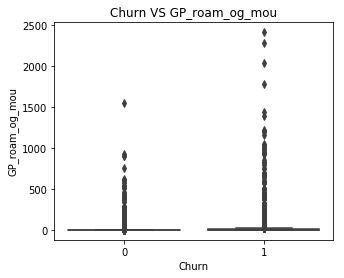

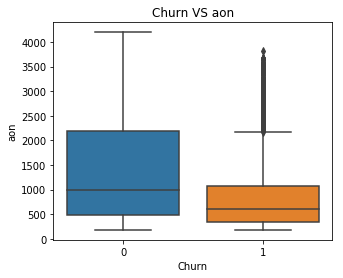

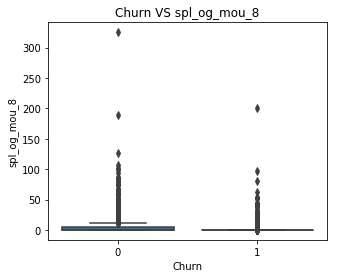

In [2144]:
for column in vif['Features']:
    title = "Churn VS "+column
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=telecom_HVC_NORMALIZED['Churn'], y=telecom_HVC_NORMALIZED[column], data=telecom_HVC_NORMALIZED)
    plt.title(title)
    plt.show()

### Important variables or predictors for telecom churn are 
0.                      arpu_8
1.             max_rech_data_8
2.            total_rech_num_8
3.                loc_ic_mou_8
4.                offnet_mou_8
5.        GP_last_day_rch_amt
6.            GP_Call_rech_amt
7.     day_of_last_rech_data_8
8.                loc_og_mou_8
9.               GP_loc_ic_mou
10.           GP_max_rech_data
11.            GP_total_og_mou
12.                onnet_mou_8
14.               GP_vol_2g_mb
13.                vol_2g_mb_8
16.         last_day_rch_amt_8
15.                   vbc_3g_8
18.               isd_og_mou_8
17.              GP_monthly_2g
19.             GP_roam_og_mou
20.                        aon
21.               spl_og_mou_8

# Recommend strategies to manage customer churn based on above observations

Based on above observations company should follow the following startegies:

    1.Reach out to customers whose avg revenue per unit is reduced in action phase, 
    1.1 the amount of data recharge is less in the action phase, 
    1.2 reacharge count (number of times) is less in action phase,
    1.3 incoming, outgoing, data usage is reduced in action phase. 
        Check with them for the reason and try to provide facilities as per the requirement.
    
    2.We can see the huge difference in box plots for day_of_last_reach_data_8. 
    Company should have a check on the last day of reacharge. It should keep a limit check, 
    if the customer is not reacharging after the 
    limit(number of days says 10 after the previous package is expired) we should reach out 
    to the customer.
    
    3.Age on network plots also have huge difference, new customers or customers with less 
    AON value are more likely to churn. As we know it is more difficult to get new customers, 
    once we get a high value customer we should try to keep them. Company should regularly 
    reach out to new customers to check on their experience with this network. 
    
    4.Keeping old high level customers is an important thing for the company, so it would be helpful
    if company can reach out to high level customers who stay for every few years or one year and provide 
    them extra benefits that would not give much loss but finally be profitable to the company. 
    Example: yearly once give them a coupon card using which they can recharge, or get 10percent discount
    on next recharge etc.
    
    5.Similarly for new customers, provide extra benefits for the starting few days/months.
    
    6. Customers who have recharged in Good Phase but have 0 usage(call+data) and 0 recharge amount in Action phase are more likely to churn. We can provide them offers befor they churn
        